# PY4109 Assignment: Heat Capacity for a Single Particle in 1D
# Michael Sweetman, 11932771

Using the potential energy confinment provided for the three dimensional simulation, the heat capcity for a single particle in 1D is calculated

This is being done using numerical methods for integration of statistical physics equations rather than a monte carlo simulation of a molecle as is done in the 3D simulatio

Note that all "Runtime errors" etc. can be ignored as they do not affect the calculation being performed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

#the integral can be partially computed using library methods, this is demonstrated here

T = 1 #absolute temperature
V0 = 1 #potential
L = 10 #size of box


z = lambda x : np.exp((-V0*(np.exp(((2*x/L)**(4))-1)))/T)     #lamda function for partition function


boxpot = lambda x : (V0)*(np.exp(((2*x/L)**(4)))-1) #contraining potential


                         
partition = scipy.integrate.quad(z,-np.inf, np.inf) #this gives integral for denominator
#first output is integral second is error

print("denominator =", partition)


#the numerator of the average potential cannot be calculated using this method
#python gives that (inf)*(0) = NaN rather than zero so this method does not return useable values
#therefore a different method will be needed in order to calculate integrals and overal average potential

denominator = (6.759733075262274, 3.727335502197684e-08)


C:\Users\sweet\AppData\Local\Temp/ipykernel_14124/1435887364.py:13: RuntimeWarning: overflow encountered in exp
  z = lambda x : np.exp((-V0*(np.exp(((2*x/L)**(4))-1)))/T)     #lamda function for partition function


In [2]:
#function to calculate and return the average potential
def avg_pot(n, L, V0, T): #n is number of subintervals for integration, L is half the box length, V0 is parameter for potential, T is temp
    n = n
    x = -L*(5)
    dx = -2*x/n #multiplied by -2 so that dx is positive

    #outputs of the lambda functions stored in lists so that they can be manipulated later
    boxpot_outputs = [0]*n
    z_outputs = [0]*n
    
    numerator = [0]*n #numerator of <V> 
    
    #lambda functions declared so that they can be used for changing values of T and L etc if used in a loop
    z = lambda x : np.exp((-V0*(np.exp(((2*x/L)**(4))-1)))/T)     #lamda function for partition function
    boxpot = lambda x : (V0)*(np.exp(((2*x/L)**(4)))-1) #constraining potential

    
    #calculating all outputs
    for i in range(n):
        boxpot_outputs[i] = boxpot(x)
        z_outputs[i] = z(x)
        x += dx


    #replacing inf with zeros
    for i in range(n):
        if(boxpot_outputs[i] == np.inf):
            boxpot_outputs[i] = 0


    #multiply by z_outputs by boxpot_outputs to get numerator values
    for i in range(n):
        numerator[i] = boxpot_outputs[i]*z_outputs[i]
    
    #trapezoidal rule integral for integrating numerator
    area = 0.0

    for i in range(n):
        if(i == 0 or i == n):
            area += (dx/2)*(numerator[i])
        
        else:
            area += (dx/2)*(2*numerator[i])       

    
    partition = scipy.integrate.quad(z,-np.inf, np.inf) #this gives integral for denominator, imporant to calculate
    #in the function to that it can be found if T is incremented in a loop
    
    potential = area/partition[0] #calculation of average potential
    
    return potential


In [3]:
#caclulating heat capcity from 0 to 2 (note that this can be quite slow if n gets large)


#declaring constants

n = 500
maxtemp = 2.0
dT = maxtemp/n
T = 0 #starting temp

#paramters for the potential, same as what was used in the 3d simulation
L = 32.0
V0 = 0.1


#storing potential and temp values so they can be graphed
avp_pot_values = [0]*n
Tpoints = [0]*n 



for i in range(n):
    Tpoints[i] = T
    avp_pot_values[i] = avg_pot(n, L, V0, T)
    T += dT
    
#-----------------------------------------------------------------------------------------
#the below can be uncommented if one wants to exame the potential output at each input T
#for i in range(n):
    #print("The averge potential at T =",Tpoints[i], "is",avp_pot_values[i])
#-----------------------------------------------------------------------------------------   
    
#calculatin heat capacity
heat_cap = [0]*n
for i in range(n):
    heat_cap[i] = avp_pot_values[i] +0.5

    

C:\Users\sweet\AppData\Local\Temp/ipykernel_14124/546548026.py:15: RuntimeWarning: overflow encountered in exp
  boxpot = lambda x : (V0)*(np.exp(((2*x/L)**(4)))-1) #constraining potential
C:\Users\sweet\AppData\Local\Temp/ipykernel_14124/546548026.py:14: RuntimeWarning: overflow encountered in exp
  z = lambda x : np.exp((-V0*(np.exp(((2*x/L)**(4))-1)))/T)     #lamda function for partition function
C:\Users\sweet\AppData\Local\Temp/ipykernel_14124/546548026.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  z = lambda x : np.exp((-V0*(np.exp(((2*x/L)**(4))-1)))/T)     #lamda function for partition function
C:\Users\sweet\AppData\Local\Temp/ipykernel_14124/546548026.py:49: RuntimeWarning: invalid value encountered in double_scalars
  potential = area/partition[0] #calculation of average potential
C:\Users\sweet\AppData\Local\Temp/ipykernel_14124/546548026.py:14: RuntimeWarning: overflow encountered in double_scalars
  z = lambda x : np.exp((-V0*(np.exp(((2*x/L)**(4))

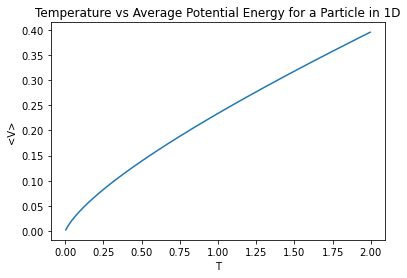

In [4]:
plt.title("Temperature vs Average Potential Energy for a Particle in 1D")
plt.xlabel('T')
plt.ylabel('<V>')
plt.plot(Tpoints ,avp_pot_values) 
plt.show()

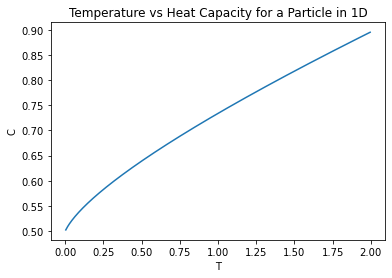

In [5]:
plt.title("Temperature vs Heat Capacity for a Particle in 1D")
plt.xlabel('T')
plt.ylabel('C')
plt.plot(Tpoints ,heat_cap) 
plt.show()